In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

## Estimacion Basica (Vainilla)

#### cargar datos

In [2]:
data = pd.read_csv("data/casas-california.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### visualizar casa de california

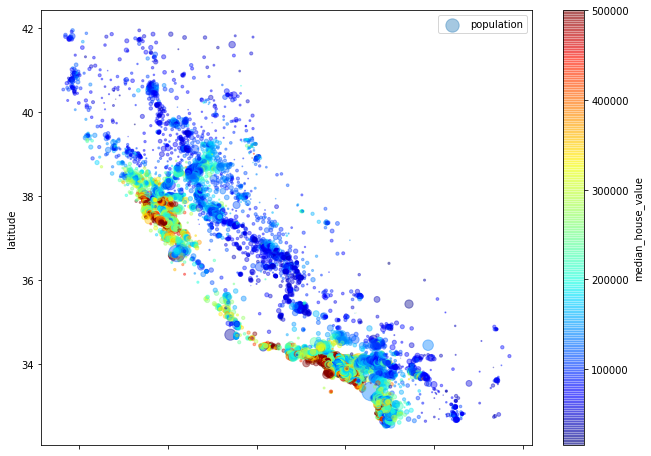

In [3]:
data.plot(kind ="scatter", x ="longitude", y ="latitude", alpha = 0.4,
             s = data["population"] / 100, label ="population", figsize =(11,8),
             c ="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, ) 
plt.legend()

#### correlaciones

In [4]:
### EJERCICIO: (1pt) 
# utilize matplotlib para desplegar la matriz de correlaciones
corr = data.corr()
corr.style.background_gradient(cmap='plasma').set_precision(2)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.92,-0.11,0.045,0.07,0.1,0.055,-0.015,-0.046
latitude,-0.92,1,0.011,-0.036,-0.067,-0.11,-0.071,-0.08,-0.14
housing_median_age,-0.11,0.011,1,-0.36,-0.32,-0.3,-0.3,-0.12,0.11
total_rooms,0.045,-0.036,-0.36,1,0.93,0.86,0.92,0.2,0.13
total_bedrooms,0.07,-0.067,-0.32,0.93,1,0.88,0.98,-0.0077,0.05
population,0.1,-0.11,-0.3,0.86,0.88,1,0.91,0.0048,-0.025
households,0.055,-0.071,-0.3,0.92,0.98,0.91,1,0.013,0.066
median_income,-0.015,-0.08,-0.12,0.2,-0.0077,0.0048,0.013,1,0.69
median_house_value,-0.046,-0.14,0.11,0.13,0.05,-0.025,0.066,0.69,1


In [5]:
### EJERCICIO: (1pt) 
# despliegue las correlaciones de la variable median_house_value
corr = data.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### limpieza de datos

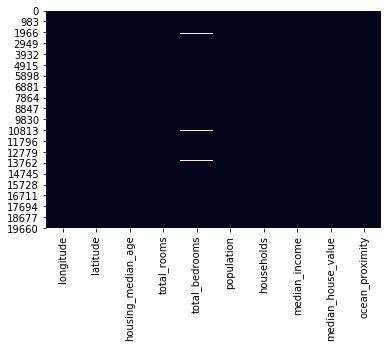

In [6]:
### EJERCICIO: (1pt)
# utilize seaborn para revisar de que no hay valores en blanco. despliegue el grafico de seaborn.

sns.heatmap(data.isnull(), cbar=False)

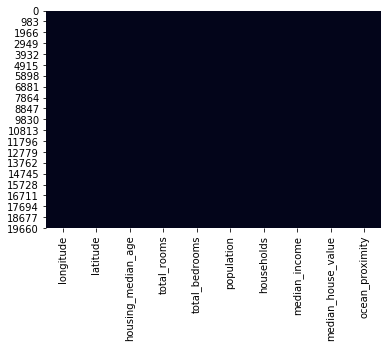

In [7]:
# Se reemplaza los nulos de total_bedrooms con la mediana
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())
sns.heatmap(data.isnull(), cbar=False)

In [8]:
### EJERCICIO: (1pt)
# Revise los tipos de las columnas y verifique que cada uno esta definido correctamente 
# (ejemplo, la variable OCEAN_PROXIMITY debe ser categorica)
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')

data2 = data.drop('ocean_proximity', axis=1)

data2 = data2.join(dummies)

data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


#### test & training set

In [9]:
### EJERCICIO: (1pt) 
# separe el dataset train:80%, test:20%, random_state=42 
# donde y = median_house_value

y = data2['median_house_value']
X = data2.drop('median_house_value', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### regresion lineal multiple

In [10]:
### EJERCICIO: (1pt)
# estime el modelo de regresion lineal utilizando Sklearn.
# imprima los coeficientes
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train.values, y_train.values)

# model.intercept_
# model.coef_

print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

b 0 : -2256620.80
b 1 : -26838.27
b 2 : -25468.35
b 3 : 1102.19
b 4 : -6.02
b 5 : 102.79
b 6 : -38.17
b 7 : 48.25
b 8 : 39473.98
b 9 : -18926.58
b 10 : -58713.24
b 11 : 117198.49
b 12 : -24063.23
b 13 : -15495.44


In [11]:
### EJERCICIO: (1pt)
# utilize statsmodels para estimar las estadisticas del modelo actual.
# estime el MSE del train/test
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

def modelStatistics(X, y):
    X2 = sm.add_constant(X)
    model_ols = sm.OLS(y, X2)
    pred = model_ols.fit()
    print(pred.summary())
    
def MSR(model, X_train, y_train, X_test, y_test):
    # MSE Train
    y_prima_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_prima_train)
    print("MSE Train:", mse_train)
    # MSE Test
    y_prima_test = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_prima_test)
    print("MSE Test:", mse_test) 
    
    return mse_train, mse_test
    
modelStatistics(X_train, y_train)
MSR(model, X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2550.
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:36:12   Log-Likelihood:            -2.0727e+05
No. Observations:               16512   AIC:                         4.146e+05
Df Residuals:                   16499   BIC:                         4.147e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/Users/aarongomez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(4683203783.504255, 4908476721.156638)

## Estimacion Avanzada - Feature Engineering

En este momento, ud acaba de realizar la estimación del modelo más básico, sin aplicar transformaciones, ni escalamientos a las variables. 

**Aqui es donde se pone bonito...**

En esta sección debe estudiar las variables, sus distribuciones, para identificar qué tipo de cosas se pueden realizar para mejorar el modelo. Vuelva a calcular las estadísticas del modelo (antes y después) para que tenga un punto de referencia.

Algunas recomendaciones:
- Trate de comprender el rol de la variable en la prediccion. Tiene sentido?
- Algunos modelos trabajan mejor con menos variables. (aqui puede agregar o remover variables)
- Aplique transformaciones para "normalizar" variables (que tengan una distribucion quasi-normal)
- considere crear nuevas variables de ser necesario: por ejemplo bedrooms_per_room = data["total_bedrooms"] / data["total_rooms"]

In [22]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones
from sklearn.preprocessing import MinMaxScaler

def sclaleFeature(feature_values):
    result = feature_values.values.reshape(-1,1)
    return MinMaxScaler().fit(result).transform(result)

data_scaled = data2.copy()

# data_scaled['median_house_value'] = sclaleFeature(data_scaled['median_house_value'])
data_scaled['housing_median_age'] = sclaleFeature(data_scaled['housing_median_age'])
data_scaled['median_income'] = sclaleFeature(data_scaled['median_income'])

data_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0.784314,880.0,129.0,322.0,126.0,0.539668,452600.0,0,0,0,1,0
1,-122.22,37.86,0.392157,7099.0,1106.0,2401.0,1138.0,0.538027,358500.0,0,0,0,1,0
2,-122.24,37.85,1.000000,1467.0,190.0,496.0,177.0,0.466028,352100.0,0,0,0,1,0
3,-122.25,37.85,1.000000,1274.0,235.0,558.0,219.0,0.354699,341300.0,0,0,0,1,0
4,-122.25,37.85,1.000000,1627.0,280.0,565.0,259.0,0.230776,342200.0,0,0,0,1,0


In [23]:
### EJERCICIO: (1pt)
# Cree o Elimine variables 
data_transformed = data_scaled.copy()
data_transformed["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data_transformed["households_by_population"] = sclaleFeature(data["households"] * data["population"])

# Drop columns
data_transformed = data_transformed.drop("total_rooms",  axis=1) 
data_transformed = data_transformed.drop('total_bedrooms', axis=1)
data_transformed = data_transformed.drop('households', axis=1)
data_transformed = data_transformed.drop('population', axis=1)

# data_transformed = data_transformed.drop('longitude', axis=1)
# data_transformed = data_transformed.drop('latitude', axis=1)

data_transformed

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedrooms_per_room,households_by_population
0,-122.23,37.88,0.784314,0.539668,452600.0,0,0,0,1,0,0.146591,0.000233
1,-122.22,37.86,0.392157,0.538027,358500.0,0,0,0,1,0,0.155797,0.015727
2,-122.24,37.85,1.000000,0.466028,352100.0,0,0,0,1,0,0.129516,0.000505
3,-122.25,37.85,1.000000,0.354699,341300.0,0,0,0,1,0,0.184458,0.000703
4,-122.25,37.85,1.000000,0.230776,342200.0,0,0,0,1,0,0.172096,0.000842
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,0.470588,0.073130,78100.0,0,1,0,0,0,0.224625,0.001605
20636,-121.21,39.49,0.333333,0.141853,77100.0,0,1,0,0,0,0.215208,0.000234
20637,-121.22,39.43,0.313725,0.082764,92300.0,0,1,0,0,0,0.215173,0.002510
20638,-121.32,39.43,0.333333,0.094295,84700.0,0,1,0,0,0,0.219892,0.001488


In [24]:
### EJERCICIO: (1pt)
# Estime nuevamente el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

y2 = data_transformed['median_house_value']
X2 = data_transformed.drop('median_house_value', axis=1, inplace=False)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model_optimized = LinearRegression().fit(X_train_2.values, y_train_2.values)

print("b",0,":","%.2f"%model_optimized.intercept_)
for i,b in zip(np.arange(1,len(model_optimized.coef_)+1), model_optimized.coef_):
    print("b",i,":", "%.2f"%b)

b 0 : -2058691.32
b 1 : -23682.32
b 2 : -21496.82
b 3 : 44718.75
b 4 : 633650.84
b 5 : -24914.64
b 6 : -61756.00
b 7 : 122540.72
b 8 : -20915.16
b 9 : -14954.93
b 10 : 293501.83
b 11 : 82460.50


In [25]:
### EJERCICIO: (1pt)
# Calcule nuevamente las estadisticas para determinar si hay mejoras sobre el modelo.
# estime el MSE del train/test

msr_train, msr_test = MSR(model, X_train, y_train, X_test, y_test)
print('optimized')
msr_train_optimized, msr_test_optimized = MSR(model_optimized, X_train_2, y_train_2, X_test_2, y_test_2)

modelStatistics(X_train_2, y_train_2)

# print('MSR Train Diff', msr_train - msr_train_optimized)
# print('MSR Test Diff', msr_test - msr_test_optimized)

# X2_2 = sm.add_constant(X_train_2)
# model_ols_2 = sm.OLS(y_train_2, X2_2)
# pred_2 = model_ols.fit()
# print(pred.summary())

# MSE Train
# y_prima_train_2 = model.predict(X_train_2)
# mse_train = mean_squared_error(y_train, y_prima_train)
# print("MSE Train:", mse_train)

# # MSE Test
# y_prima_test = model.predict(X_test)
# mse_test = mean_squared_error(y_test, y_prima_test)
# print("MSE Test:", mse_test)

MSE Train: 4683203783.504255
MSE Test: 4908476721.156638
optimized
MSE Train: 5044684617.6019745
MSE Test: 5714162359.431145
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     2722.
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:39:04   Log-Likelihood:            -2.0788e+05
No. Observations:               16512   AIC:                         4.158e+05
Df Residuals:                   16501   BIC:                         4.159e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025   

/Users/aarongomez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
